##Sample

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
dataset = pd.read_excel('/content/saintek_ddc.xlsx')
dataset

,title,title_remainder,topic1,topic2,topic3,topic4,topic5,Jurusan
0,Harvests of change americsn literature 1865-1914,NaN,Hasil panen,Perubahan,Daftar bacaan,Kepustakaan,Amerika,Agroteknologi
1,Problem Solving With C++,NaN,Algoritma,Program Teknik,Standar Kelas,Pointer,Variabel,"Teknik Informatika, Teknik Elektro"
2,Elektronika Komputer Digital,Pengantar Mikrokomputer,Sistem & Kode Bilangan,Gerbang Logika,Rangkaian TTL,Flip Flop,NaN,Teknik Informatika
3,Mac Mini Hacks & Mods For Dummies,NaN,RAM,Instal,Audio,OUD,Mini,Teknik Informatika
4,Science,NaN,Energi,Ilmu Pengetahuan,Sain,Manusia,Grafitasi,"Kimia, Fisika, Biologi"
...,...,...,...,...,...,...,...,...
1218,Ilmu Pangan,NaN,Mikroorganisme,Food Higiene,Pengawetan,Air,NaN,Agroteknologi
1219,Lada Budi Daya & Tata Niaga,Seri Agribinis,Tanaman,Bibit,Perdu,Panen,Perdagangan,Agroteknologi
1220,Budi Daya Lada,Si Raja Rempah-Rempah,Lada - Rempah-Rempah,Jenis Lada,Pembibitan,Lahan,Pengendalian Hama-Usaha,Agroteknologi
1221,Scramble,A Narrative History of The Battle of Britain,Perang Dunia,Krisis,London,NaN,NaN,Kimia


In [6]:
initial_shape = dataset.shape

cleaned_dataset = dataset.dropna(subset=['Jurusan'])

final_shape = cleaned_dataset.shape
cleaned_dataset.head()

,title,title_remainder,topic1,topic2,topic3,topic4,topic5,Jurusan
0,Harvests of change americsn literature 1865-1914,NaN,Hasil panen,Perubahan,Daftar bacaan,Kepustakaan,Amerika,Agroteknologi
1,Problem Solving With C++,NaN,Algoritma,Program Teknik,Standar Kelas,Pointer,Variabel,"Teknik Informatika, Teknik Elektro"
2,Elektronika Komputer Digital,Pengantar Mikrokomputer,Sistem & Kode Bilangan,Gerbang Logika,Rangkaian TTL,Flip Flop,NaN,Teknik Informatika
3,Mac Mini Hacks & Mods For Dummies,NaN,RAM,Instal,Audio,OUD,Mini,Teknik Informatika
4,Science,NaN,Energi,Ilmu Pengetahuan,Sain,Manusia,Grafitasi,"Kimia, Fisika, Biologi"


##Pengkodean Label Biner

In [7]:
cleaned_dataset['Jurusan'] = cleaned_dataset['Jurusan'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_dataset['Jurusan'])
print("Label biner:")
print(y)
print("Kelas")
print(mlb.classes_)
print("Bentuk dari y setelah fit_transform:", y.shape)

Label biner:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Kelas
['Agroteknologi' 'Biologi' 'Fisika' 'Kimia' 'Matematika' 'Teknik Elektro'
 'Teknik Informatika']
Bentuk dari y setelah fit_transform: (1223, 7)


##Explore

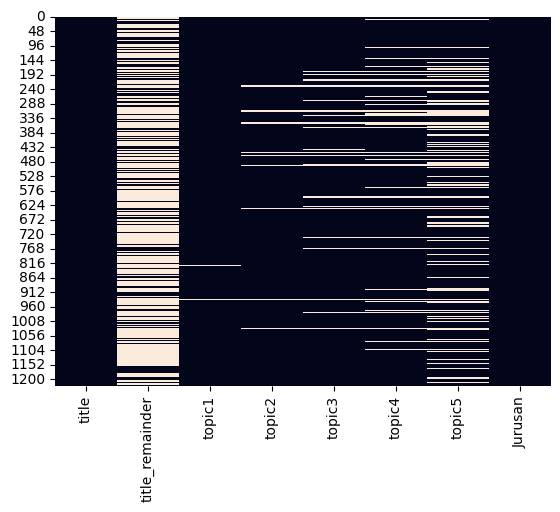

In [8]:
# Heatmap dengan seaborn
sns.heatmap(cleaned_dataset.isnull(), cbar=False)
plt.show()

In [9]:
missing_values = cleaned_dataset.isnull().sum()

missing_values

,0
title,0
title_remainder,806
topic1,7
topic2,47
topic3,92
topic4,144
topic5,328
Jurusan,0


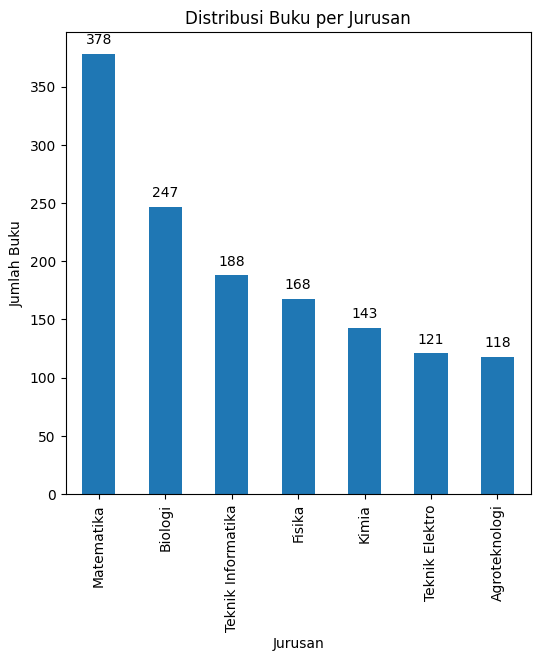

In [26]:
y_df = pd.DataFrame(y, columns=mlb.classes_)

# Menghitung jumlah buku per jurusan
jurusan_counts = y_df.sum().sort_values(ascending=False)

# Membuat plot distribusi buku per jurusan
ax = jurusan_counts.plot(kind='bar', figsize=(6, 6))
plt.title('Distribusi Buku per Jurusan')
plt.xlabel('Jurusan')
plt.ylabel('Jumlah Buku')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [11]:
dataset = pd.DataFrame(cleaned_dataset)

# Menggabungkan kolom menjadi satu kolom baru bernama 'buku'
dataset['buku'] = dataset[['title', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].fillna('').agg(' '.join, axis=1)
dataset

,title,title_remainder,topic1,topic2,topic3,topic4,topic5,Jurusan,buku
0,Harvests of change americsn literature 1865-1914,NaN,Hasil panen,Perubahan,Daftar bacaan,Kepustakaan,Amerika,[Agroteknologi],Harvests of change americsn literature 1865-19...
1,Problem Solving With C++,NaN,Algoritma,Program Teknik,Standar Kelas,Pointer,Variabel,"[Teknik Informatika, Teknik Elektro]",Problem Solving With C++ Algoritma Program Tek...
2,Elektronika Komputer Digital,Pengantar Mikrokomputer,Sistem & Kode Bilangan,Gerbang Logika,Rangkaian TTL,Flip Flop,NaN,[Teknik Informatika],Elektronika Komputer Digital Sistem & Kode Bil...
3,Mac Mini Hacks & Mods For Dummies,NaN,RAM,Instal,Audio,OUD,Mini,[Teknik Informatika],Mac Mini Hacks & Mods For Dummies RAM Instal A...
4,Science,NaN,Energi,Ilmu Pengetahuan,Sain,Manusia,Grafitasi,"[Kimia, Fisika, Biologi]",Science Energi Ilmu Pengetahuan Sain Manusia G...
...,...,...,...,...,...,...,...,...,...
1218,Ilmu Pangan,NaN,Mikroorganisme,Food Higiene,Pengawetan,Air,NaN,[Agroteknologi],Ilmu Pangan Mikroorganisme Food Higiene Pengaw...
1219,Lada Budi Daya & Tata Niaga,Seri Agribinis,Tanaman,Bibit,Perdu,Panen,Perdagangan,[Agroteknologi],Lada Budi Daya & Tata Niaga Tanaman Bibit Perd...
1220,Budi Daya Lada,Si Raja Rempah-Rempah,Lada - Rempah-Rempah,Jenis Lada,Pembibitan,Lahan,Pengendalian Hama-Usaha,[Agroteknologi],Budi Daya Lada Lada - Rempah-Rempah Jenis Lada...
1221,Scramble,A Narrative History of The Battle of Britain,Perang Dunia,Krisis,London,NaN,NaN,[Kimia],Scramble Perang Dunia Krisis London


In [12]:
pip install nltk sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.9 MB/s eta 0:00:00


In [13]:
import string
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords bahasa Inggris
stopwords_english = set(stopwords.words('english'))

# Stopwords bahasa Indonesia
stopwords_indonesian = set(stopwords.words('indonesian'))

# Gabungkan stopwords bahasa Inggris dan Indonesia
stopwords_all = list(stopwords_english.union(stopwords_indonesian))

# Inisialisasi stemmer bahasa Indonesia dan inggris
english_stemmer = PorterStemmer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi preprocessing
def preprocess_and_stem(text, language='english'):
    if pd.isna(text):
        return ""
    # Case folding
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenizing
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords_all]

    # Stemming
    if language == 'english':
        words = [english_stemmer.stem(word) for word in words]
    elif language == 'indonesian':
        words = [indonesian_stemmer.stem(word) for word in words]

    # Join kembali menjadi teks
    return ' '.join(words)

# Terapkan preprocessing ke setiap judul
dataset['clean_data'] = dataset['buku'].apply(preprocess_and_stem)

# Tampilkan hasil
dataset['clean_data']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,clean_data
0,harvest chang americsn literatur hasil panen p...
1,problem solv c algoritma program teknik standa...
2,elektronika komput digit sistem kode bilangan ...
3,mac mini hack mod dummi ram instal audio oud mini
4,scienc energi ilmu pengetahuan sain manusia gr...
...,...
1218,ilmu pangan mikroorganism food higien pengawet...
1219,lada budi daya tata niaga tanaman bibit perdu ...
1220,budi daya lada lada rempahrempah jeni lada pem...
1221,scrambl perang dunia krisi london


##Split Data

In [14]:
# Remove rows where the 'Jurusan' column is empty
dataset = dataset.dropna(subset=['Jurusan'])

# Prepare the data
X = dataset['clean_data']
y = mlb.fit_transform(dataset['Jurusan'])

# Replace NaN values in X with empty strings to avoid issues during vectorization
X = X.fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (978,)
Ukuran X_test: (245,)
Ukuran y_train: (978, 7)
Ukuran y_test: (245, 7)


In [15]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

##TF-IDF

In [16]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

##Model Terbaik

In [17]:
knn = KNeighborsClassifier(metric='cosine')
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['distance']
}
grid = GridSearchCV(knn, param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train_tfidf, y_train)

y_pred = grid.predict(X_test_tfidf)

report = classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0)
print(report)

print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=9, weigh

In [18]:
results = grid.cv_results_
print("Mean Test Scores:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Parameters: {params}, Mean Test Score: {mean_score:.4f}")

Mean Test Scores:
Parameters: {'n_neighbors': 3, 'weights': 'distance'}, Mean Test Score: 0.7607
Parameters: {'n_neighbors': 5, 'weights': 'distance'}, Mean Test Score: 0.7618
Parameters: {'n_neighbors': 7, 'weights': 'distance'}, Mean Test Score: 0.7464
Parameters: {'n_neighbors': 9, 'weights': 'distance'}, Mean Test Score: 0.7536
Parameters: {'n_neighbors': 11, 'weights': 'distance'}, Mean Test Score: 0.7485


In [19]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

# Exact match ratio
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

# Hamming loss
hamming = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming:.2f}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

# Menghitung recall
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

# Menghitung F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')

accuracy: 0.80
Hamming Loss: 0.04
Precision: 0.85
Recall: 0.83
F1 Score: 0.84


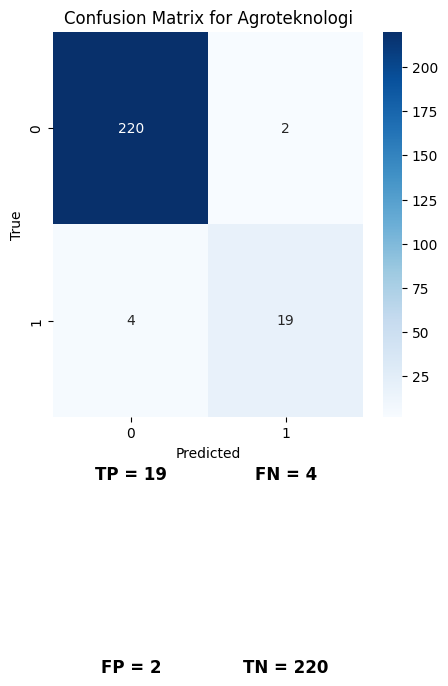

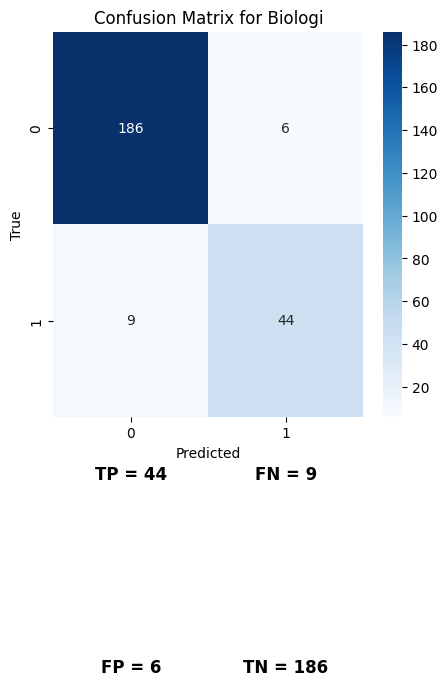

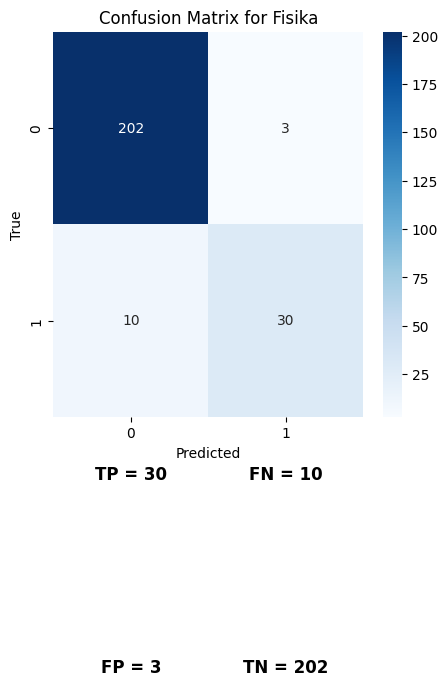

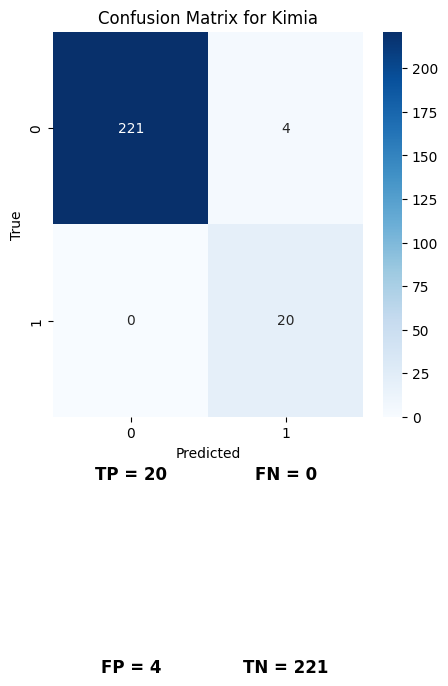

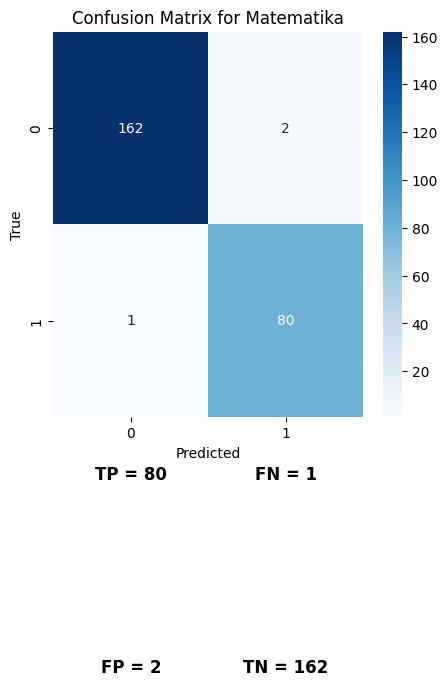

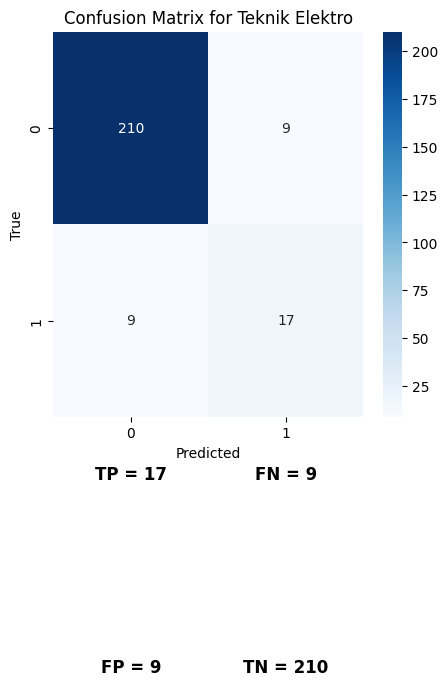

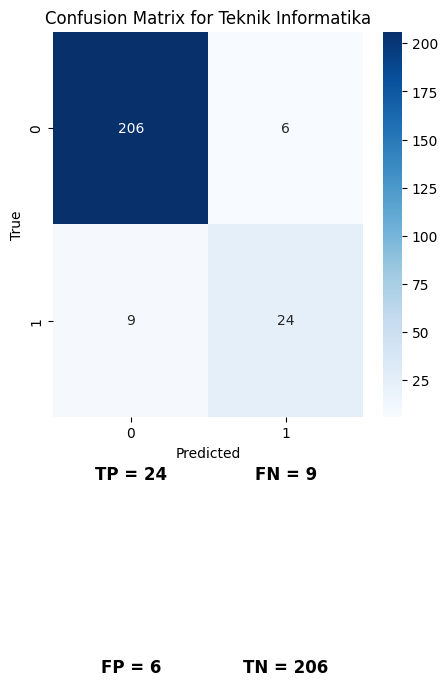

In [20]:
for i, label in enumerate(mlb.classes_):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])

    # Hitung nilai TP, TN, FP, FN
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Tambahkan label TP, TN, FP, FN
    plt.text(0.5, 2.3, f'TP = {tp}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', weight='bold')
    plt.text(1.5, 2.3, f'FN = {fn}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', weight='bold')
    plt.text(0.5, 3.3, f'FP = {fp}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', weight='bold')
    plt.text(1.5, 3.3, f'TN = {tn}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', weight='bold')

    plt.show()

In [21]:
original_X = dataset ['title'] + dataset['topic1'] + " " + dataset['topic2'] + " " + dataset['topic3'].fillna('') + " " + dataset['topic4'].fillna('') + " " + dataset['topic5'].fillna('')
original_X = original_X.fillna('')

# Vectorize the text data for the original dataset using the same vectorizer used for training
original_X_tfidf = vectorizer.transform(original_X)

# Predict the full original dataset using the trained model
original_predictions = grid.predict(original_X_tfidf)
print(original_predictions)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [22]:
proba_predictions = np.array(original_predictions)

# Thresholding untuk Menghindari Prediksi Kosong
threshold = 0.4
final_predictions = (proba_predictions >= threshold).astype(int)

# 8. Fallback jika Prediksi Tetap Kosong
for i in range(final_predictions.shape[0]):
    if not final_predictions[i].any():  # Jika semua label adalah 0
        final_predictions[i, np.argmax(proba_predictions[i])] = 1  # Set label dengan probabilitas tertinggi sebagai 1

# Ubah Prediksi Biner ke Label Asli
predicted_classes = mlb.inverse_transform(final_predictions)

predicted_classes

[('Agroteknologi',),
 ('Teknik Elektro', 'Teknik Informatika'),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Biologi', 'Fisika', 'Kimia'),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Elektro', 'Teknik Informatika'),
 ('Teknik Elektro', 'Teknik Informatika'),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Matematika',),
 ('Agroteknologi',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Agroteknologi',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Elektro', 'Teknik Informatika'),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik Informatika',),
 ('Teknik In

In [23]:
# Membuat DataFrame dengan kolom tambahan 'Classes' yang berisi prediksi
dataset_label = dataset.copy()  # Salin dataset asli agar tidak dimodifikasi
dataset_label['Classes'] = predicted_classes  # Menambahkan kolom prediksi ke dataset

# Menyimpan DataFrame yang diperbarui ke file Excel
output_file_path = 'dataset_with_classes.xlsx'
dataset_label.to_excel(output_file_path, index=False)

print(f"Dataset dengan kolom tambahan 'Classes' berhasil disimpan ke '{output_file_path}'")

Dataset dengan kolom tambahan 'Classes' berhasil disimpan ke 'dataset_with_classes.xlsx'


In [24]:
title = "Sistem Operasi"
topic1 = "Sistem"
topic2 = "Proteksi"
topic3 = "Konsep"
topic4 = "Struktur"
topic5 = "Manajemen"

# Function to make predictions with input variables
def predict_jurusan(title, topic1, topic2, topic3, topic4, topic5):
    input_data = title + " " + (topic1 if topic2 else '') + " " + (topic2 if topic2 else '') + " " + (topic3 if topic3 else '') + " " + (topic4 if topic4 else '') + " " + (topic5 if topic5 else '')
    input_data = preprocess_and_stem(input_data)
    input_data_tfidf = vectorizer.transform([input_data])
    prediction = grid.predict(input_data_tfidf)
    return prediction[0]

# Predicting with the given inputs
example_prediction = predict_jurusan(title, topic1, topic2, topic3, topic4, topic5)
predicted_classes = mlb.classes_[example_prediction.nonzero()[0]]
predicted_classes

array(['Teknik Elektro', 'Teknik Informatika'], dtype=object)

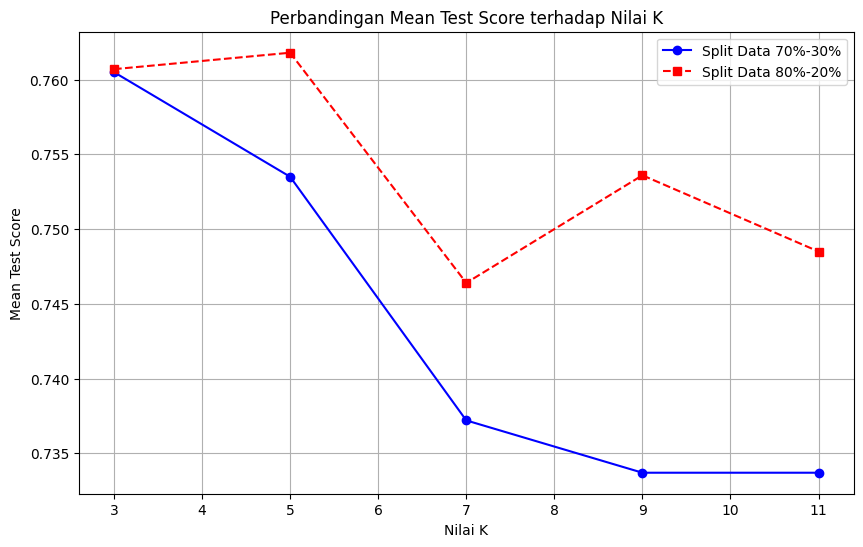

In [25]:
import matplotlib.pyplot as plt

nilai_k = [3, 5, 7, 9, 11]
mean_test_70_30 = [0.7605, 0.7535, 0.7372, 0.7337, 0.7337]
mean_test_80_20 = [0.7607, 0.7618, 0.7464, 0.7536, 0.7485]

plt.figure(figsize=(10, 6))

plt.plot(nilai_k, mean_test_70_30, marker='o', linestyle='-', color='b', label='Split Data 70%-30%')

plt.plot(nilai_k, mean_test_80_20, marker='s', linestyle='--', color='r', label='Split Data 80%-20%')

plt.title('Perbandingan Mean Test Score terhadap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Mean Test Score')

plt.legend()
plt.grid(True)
plt.show()
